# Predictive & Prescriptive Analytics


Normally, the operation of a certain machine is guided by a set of process parameters that influence process quality that dictate the final result of a certain product. In order to achieve that, the correct process parameters need to be chosen that would yield the correct process quality subject to a set of process conditions. Hence, there is an implicit relation between the influence of machine parameters in the final quality of the product. This way, a good understanding of how process parameters influence the process quality is peremptory for process automation. Normally, the exploration of these relations is made by a set of experiments by performing a Design of Experiment (DoE) - Full Factorial Design or Fractional Factorial Design - to know how of the process parameters map into the process quality. From these experimental findings, normally a dataset is built and machine learning techniques can be used to build process models, which is a simplified version of the real world dynamics - also known as surrogate model. However, as referred before, for the selection of the most suitable process parameters according to certain process quality, this model is necessary but not sufficient. Additionally, an optimization problem is normally formulated to explore the machine parameter feature space that minimizes the distance between the desired process quality and the ones yielded by the process model.

To better understand the presented scenario of process parameter optimization, a description of the process will be given. The laser seam welding process is composed of laser head mounted in a robotic arm with the goal of welding two metal sheets by issuing radiation from the laser head to a local area where the materials need to be joined. Thus, it creates a melting zone around the laser focus in both sheets, which solidifies once the the laser beam is moved through the desired welding area. This produces a continuous welding seam while the beam is moved along the overlapping sheets at a controlled speed. In this particular scenario, the process parameters that can be changed are described by 3 independent variables:
- Laser Head Power (P);
- Focal Distance (F) from the surface;
- Robotic Arm Velocity (V). 

The observed process quality is described by: 
- Weld Width (W);
- Penetration Depth (D) of the welded area.

For this work, 3 different datasets are available representing 3 different welding processes in the same machine, where different pairs of materials with different properties and thicknesses were used. These pairs are namely DC04-HC380LA (Process 1), HC260LA-HC420LA (Process 2) and HC420LA-HC380LA (Process 3). Although having 3 different datasets, for simplicity educational purposes only the first process is being used. The following image is a summary of the all processes and datasets.


<div>
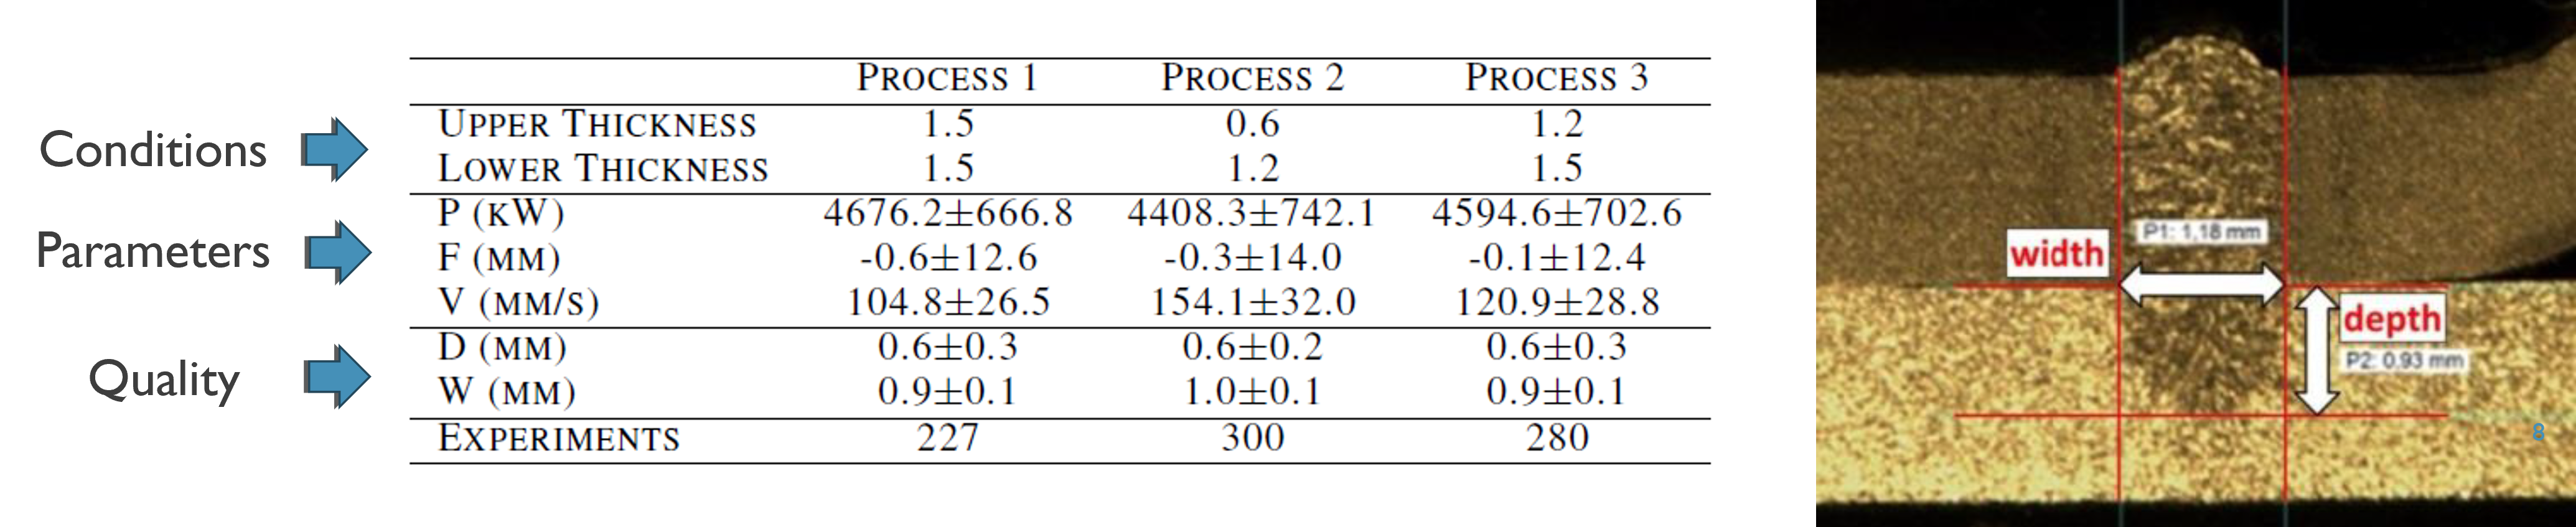
</div>

If some of these results or dataset is used, please consider citing the following publication:

    Reis, J., & Gonçalves, G. (2018, September). Laser Seam Welding optimization using Inductive Transfer Learning with Artificial Neural Networks. In 2018 IEEE 23rd International Conference on Emerging Technologies and Factory Automation (ETFA) (Vol. 1, pp. 646-653). IEEE.
    
    Reis, J., & Gonçalves, G. (2018). Process Modeling and Parameter Optimization for Machine Calibration in Smart Manufacturing for Laser Seam Welding. In The Seventh International Conference on Intelligent Systems and Applications (INTELLI). IARIA.

## Data import

Importing data from CSV files collected at the shop-floor. 

In [1]:
import numpy as np
import pandas as pd

# Laser welding processes with different materials
dataset1 = 'DC04_HC380LA'
dataset2 = 'HC260LA_HC420LA'
dataset3 = 'HC420LA_HC380LA'
dataset_name = [dataset1,dataset2,dataset3]
dataset_path = "dataset/"
dataset_meta = ['power','focus','weld_velocity','penetration','weld_width']

np.set_printoptions(suppress=True)

#Load datasets
df_dc04 = pd.read_csv(dataset_path + dataset1 + "_no_keyhole.csv",delimiter=";")
df_hc260 = pd.read_csv(dataset_path + dataset2 + "_no_keyhole.csv",delimiter=";")
df_hc420 = pd.read_csv(dataset_path + dataset3 + "_no_keyhole.csv",delimiter=";")


#print('df_dc04 head: ' , df_dc04.head(10))
#print('df_hc260 head: ' , df_hc260.head(10))
#print('df_hc420 head: ' , df_hc420.head(10))

print('df_dc04 shape: ' , df_dc04.shape)
print('df_hc260 shape: ' , df_hc260.shape)
print('df_hc420 shape: ' , df_hc420.shape)

target_dataset = df_hc260

df_dc04 shape:  (188, 5)
df_hc260 shape:  (260, 5)
df_hc420 shape:  (220, 5)


## Data Visualization - Scatter Matrix Plot

DC04_HC380LA


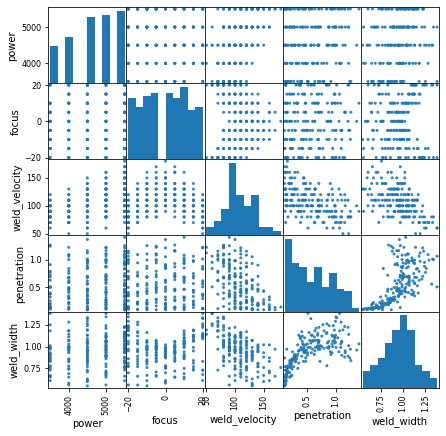

HC260LA_HC420LA


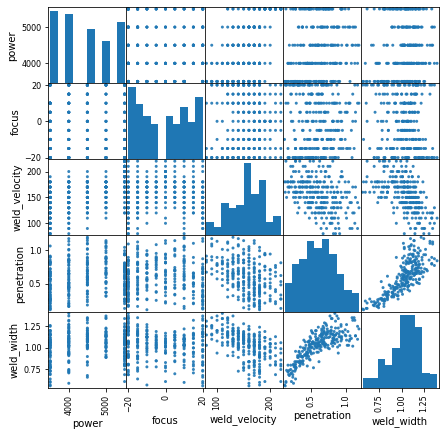

HC420LA_HC380LA


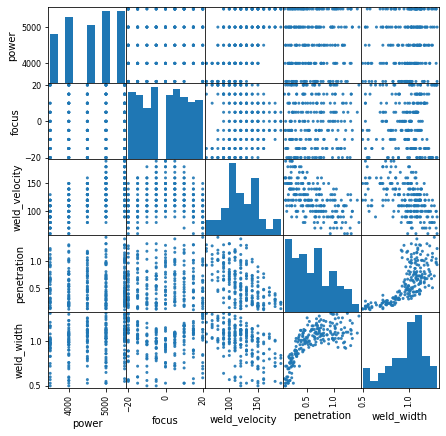

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# resize scatter matrix plot
plt.rcParams["figure.figsize"] = (7,7)

print(dataset1)
pd.plotting.scatter_matrix(df_dc04, alpha=0.9)
plt.show()

print(dataset2)
pd.plotting.scatter_matrix(df_hc260, alpha=0.9)
plt.show()

print(dataset3)
pd.plotting.scatter_matrix(df_hc420, alpha=0.9)
plt.show()


## Data Visualization - 3D Scatter plot

<IPython.core.display.Javascript object>


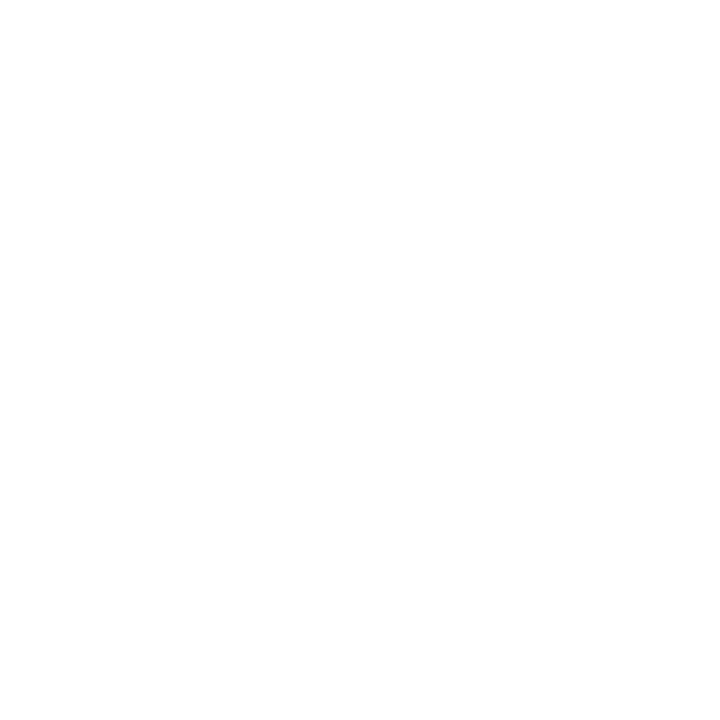

<IPython.core.display.Javascript object>


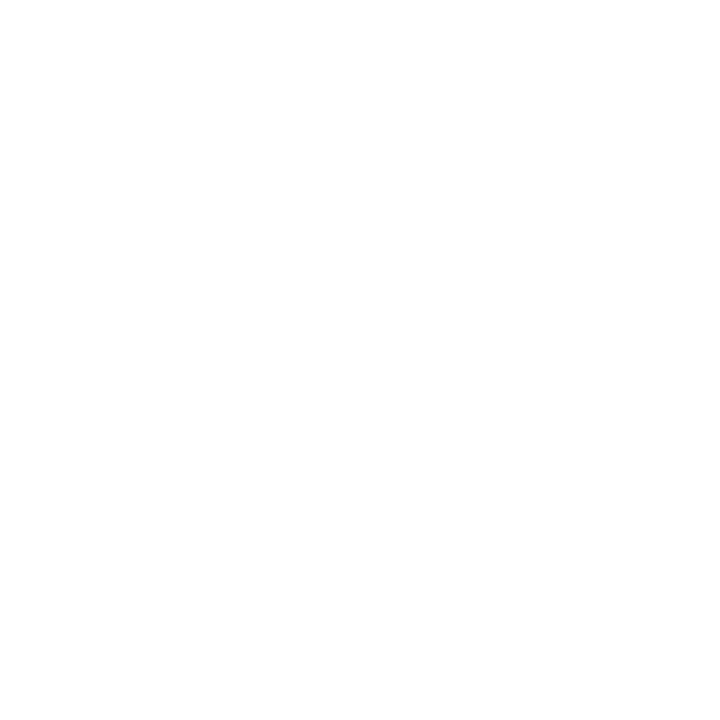

<IPython.core.display.Javascript object>


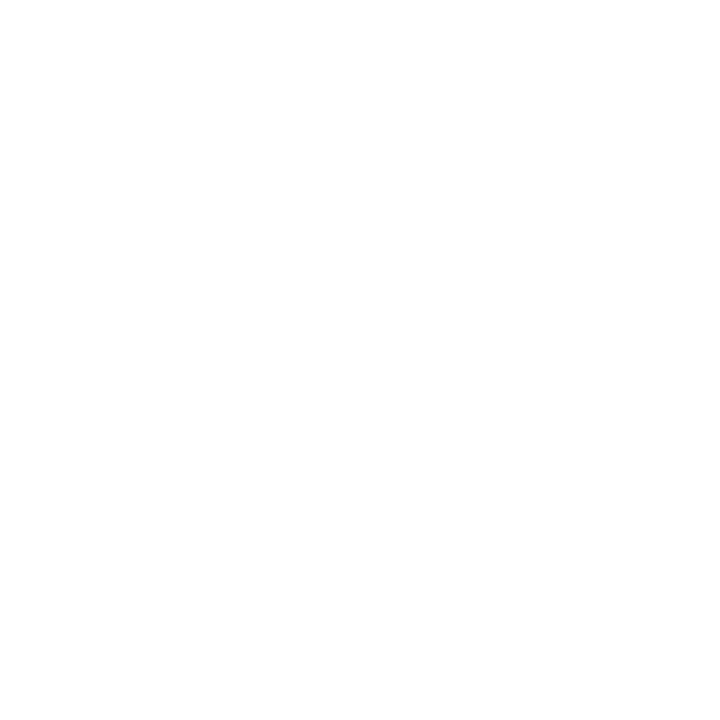

<IPython.core.display.Javascript object>


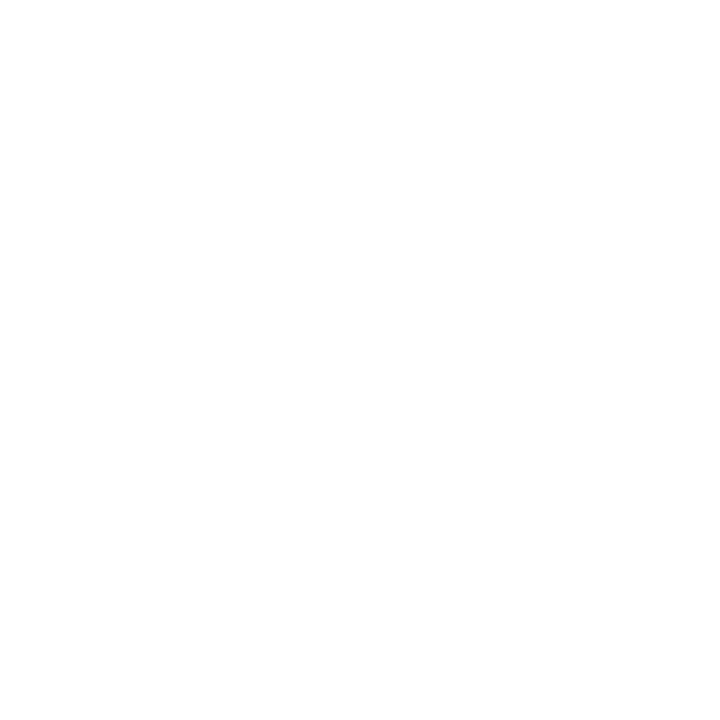

<IPython.core.display.Javascript object>


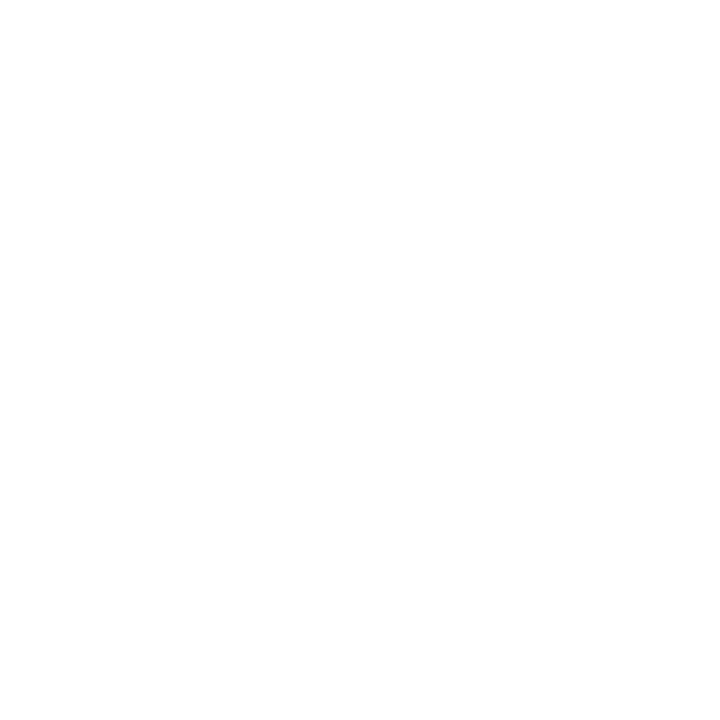

<IPython.core.display.Javascript object>


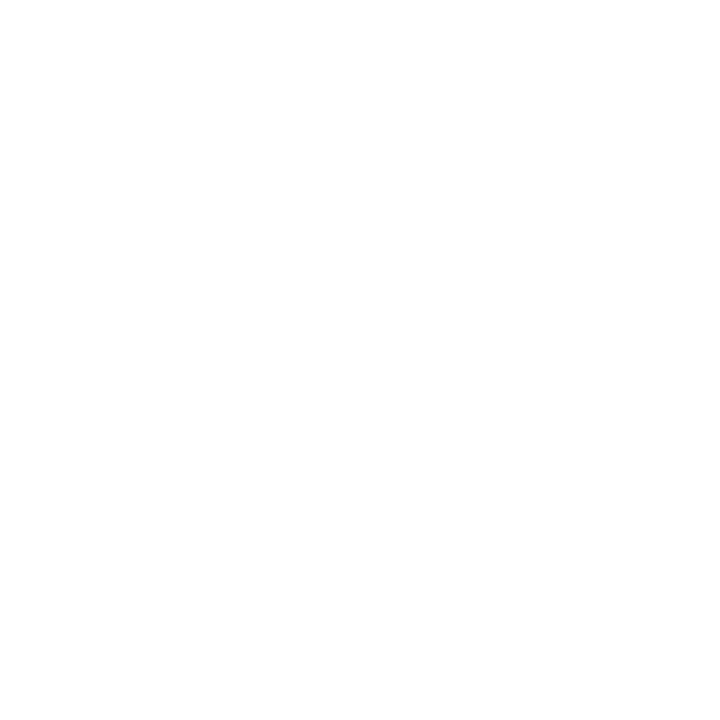

<IPython.core.display.Javascript object>


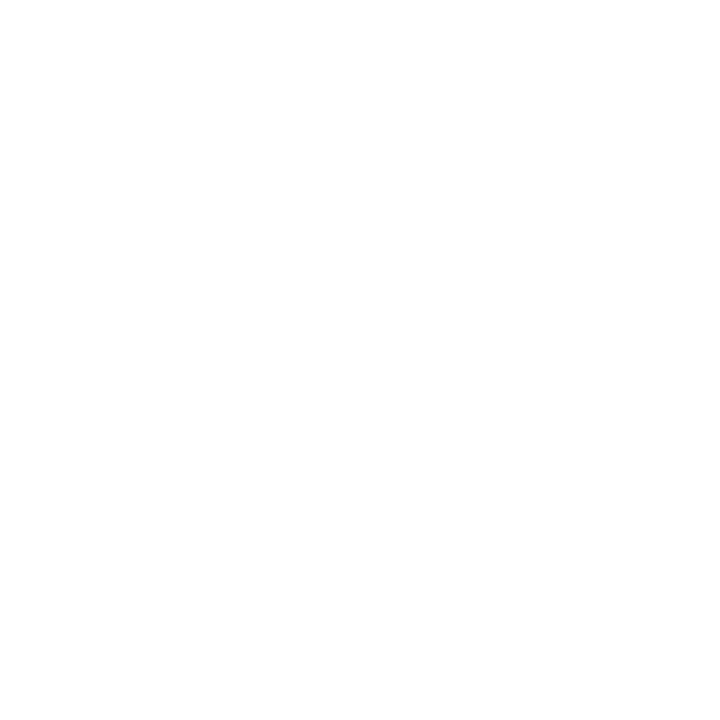

<IPython.core.display.Javascript object>


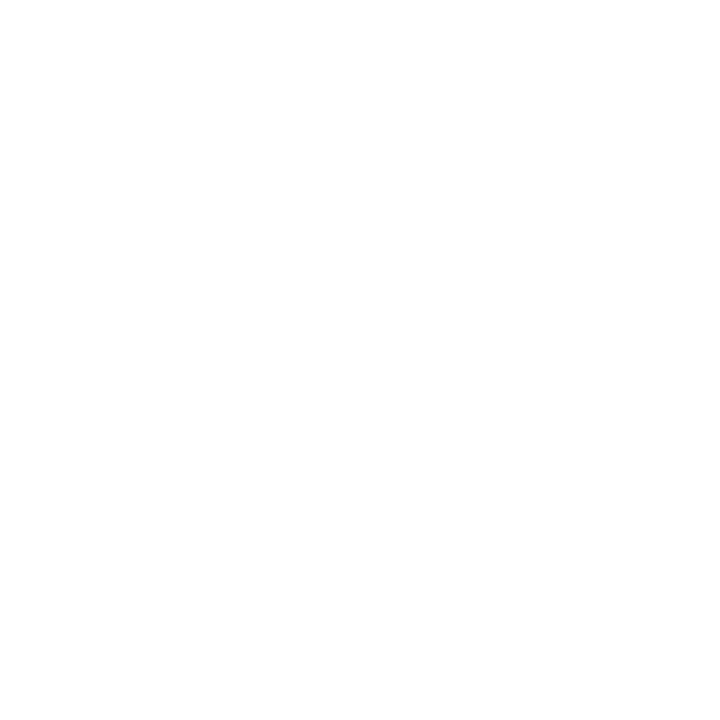

<IPython.core.display.Javascript object>


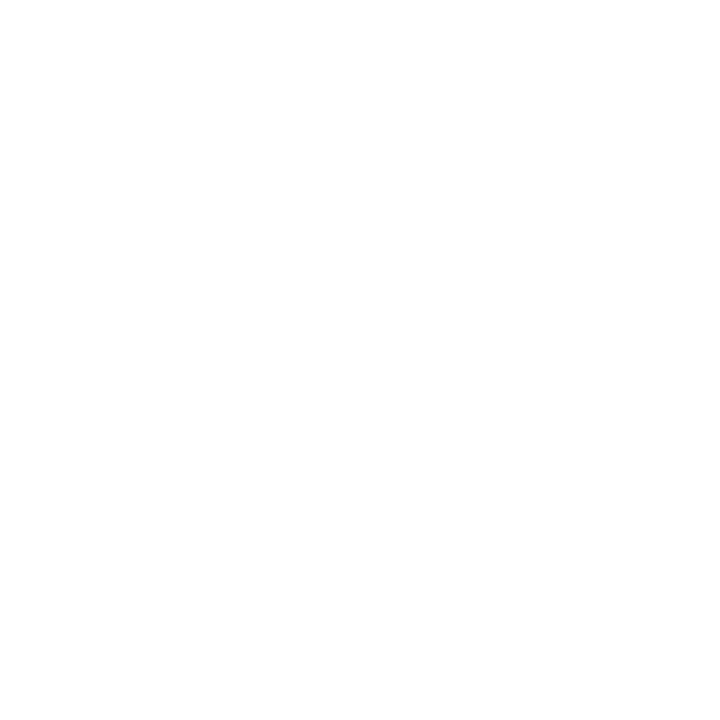

<IPython.core.display.Javascript object>


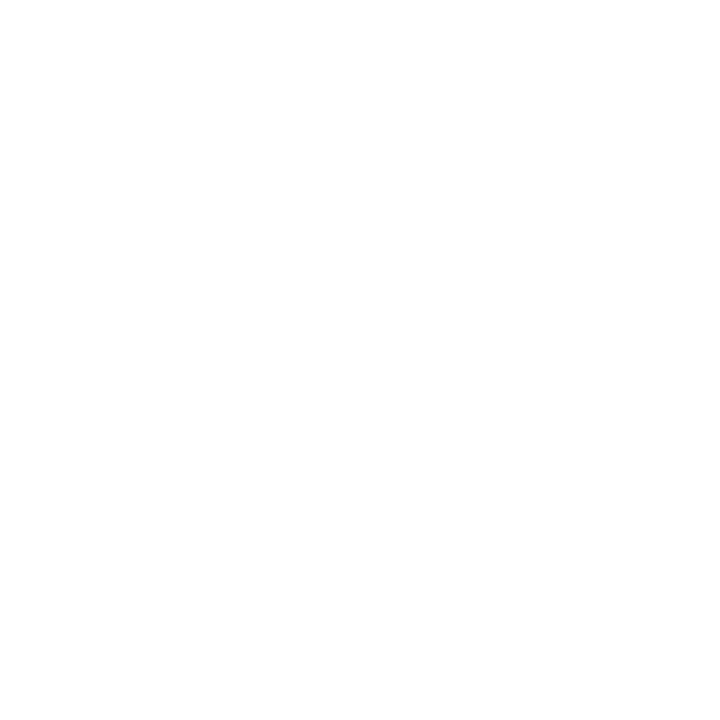

<IPython.core.display.Javascript object>


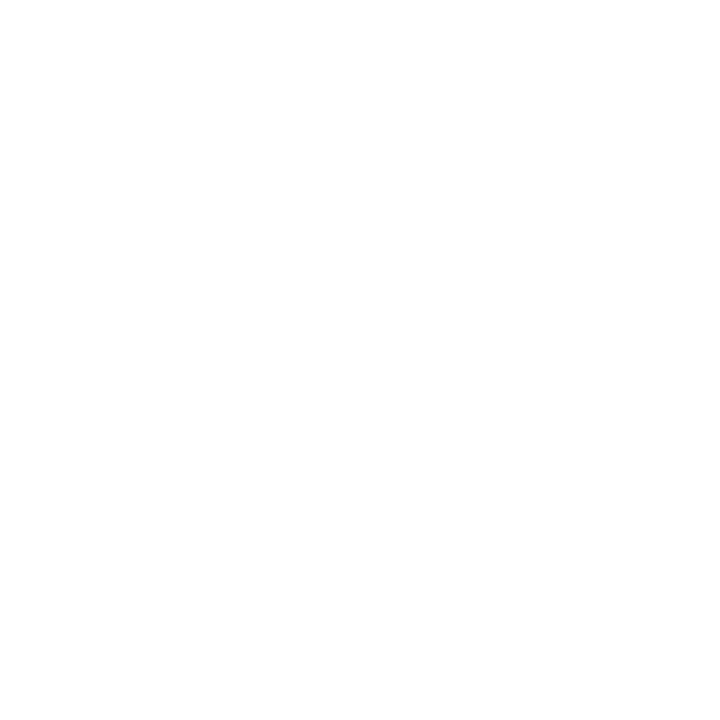

<IPython.core.display.Javascript object>


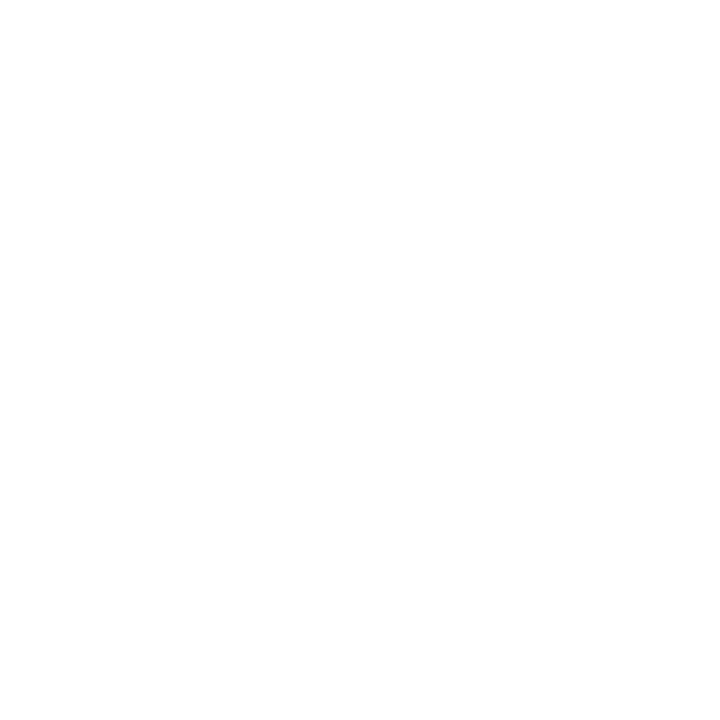

In [3]:

################################################################
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (8,8)

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, target_dataset[["penetration"]].values)
ax.set_title("Power and Focus VS Depth")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, target_dataset[["weld_width"]].values)
ax.set_title("Power and Focus VS Width")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")








##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, target_dataset[["penetration"]].values)
ax.set_title("Weld Velocity and Focus VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, target_dataset[["weld_width"]].values)
ax.set_title("Weld Velocity and Focus VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")






##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, target_dataset[["penetration"]].values)
ax.set_title("Weld Velocity and Power VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Depth")

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, target_dataset[["weld_width"]].values)
ax.set_title("Weld Velocity and Power VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Width")


plt.show()

## Data Visualization - Heatmap

From the provided heatmap, we could extrapolate a couple things:

- Correlation between weld velocity and both penetration depth and weld width is high, which is a good indication for modeling purposes
- Correlation among both outputs is also high, which might indicate that one can be removed to simplify the problem. However, since these two outputs are related to quality and we will be needing these for afterwards estimation, none will be removed
- No high correlation were observed among input features, which indicate that all of them should be contributing for the output.

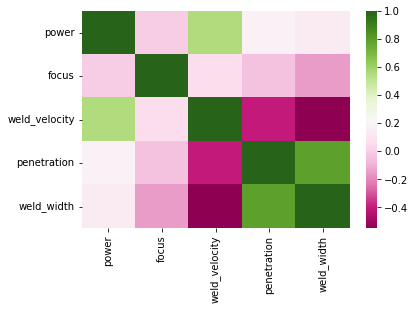

In [4]:
%matplotlib inline
import seaborn as sns

corr = target_dataset.corr()

sns.heatmap(corr, cmap="PiYG")

plt.show()

# Outlier detection

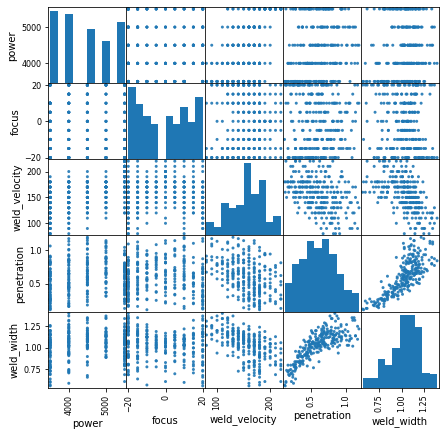

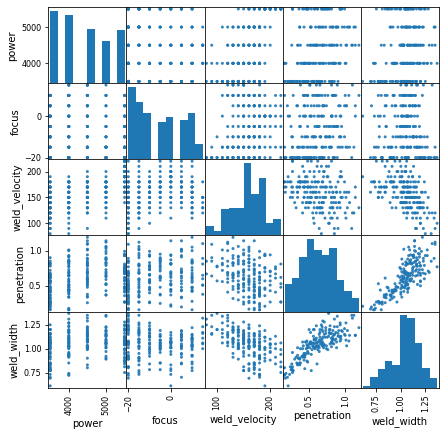

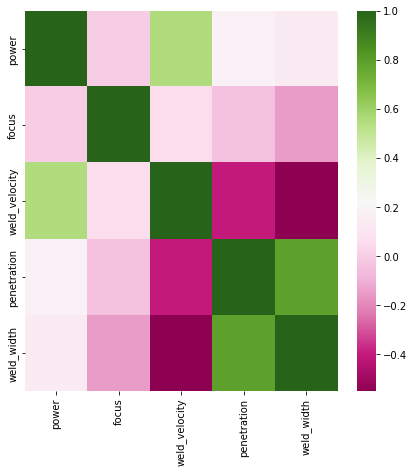

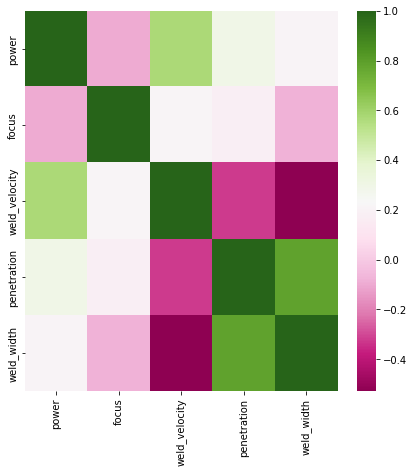

Original shape:  (260, 5)
Resulting shape:  (192, 5)


In [5]:
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#############################################
clf = EllipticEnvelope(contamination=0.261)
#clf = OneClassSVM(nu=0.261, gamma=0.05)
#clf = EllipticEnvelope(support_fraction=1., contamination=0.4)

clf.fit(target_dataset)
out = clf.predict(target_dataset)
labels = np.where(out == -1)

# create a new version of the dataset with filtered data
target_dataset_filt = target_dataset.drop(target_dataset.index[labels[0]])


#############################################
# Scatter matrix plot for unfiltered data
plt.rcParams["figure.figsize"] = (7,7)
pd.plotting.scatter_matrix(target_dataset, alpha=0.9)
plt.show()

#############################################
# Scatter matrix plot for filtered data
plt.rcParams["figure.figsize"] = (7,7)
pd.plotting.scatter_matrix(target_dataset_filt, alpha=0.9)
plt.show()


#############################################
# Correlation matrix for unfiltered data
corr = target_dataset.corr()
sns.heatmap(corr, cmap="PiYG")
plt.show()

#############################################
# Correlation matrix for filtered data
corr = target_dataset_filt.corr()
sns.heatmap(corr, cmap="PiYG")
plt.show()



#############################################
# Assuming outlier removal
print("Original shape: " , target_dataset.shape)
#target_dataset = target_dataset_filt
print("Resulting shape: " , target_dataset_filt.shape)

# Data Normalization

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


min_max_scaler_x = preprocessing.MinMaxScaler()
X = target_dataset[["power", "focus", "weld_velocity"]].values
X_norm = min_max_scaler_x.fit_transform(X)

min_max_scaler_y = preprocessing.MinMaxScaler()
Y = target_dataset[["penetration", "weld_width"]].values
Y_norm = min_max_scaler_y.fit_transform(Y)

# Train & Testing

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm, test_size=0.3, random_state=0)
print("X_train:" , X_train.shape)
print("X_test:" , X_test.shape)
print("y_train:" , Y_train.shape)
print("y_test:" , Y_test.shape)



# define base model
def baseline_model():
    # create model
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer="uniform", activation="sigmoid", input_dim = 3))
    classifier.add(Dense(units = 10, kernel_initializer="uniform", activation="sigmoid"))
    classifier.add(Dense(units = 2, kernel_initializer="uniform", activation="linear"))
    
    classifier.compile(loss='mean_squared_error', optimizer='adam')
    
    return classifier


##############################
# One
'''
estimator = KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=100, verbose=0)
estimator.fit(X_norm, Y_norm)
'''


'''
##############################
# Pipeline
estimators = []
estimators.append(('standardize', preprocessing.MinMaxScaler()))
estimators.append(("mlp4",KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)

kfold = KFold(n_splits=5)
results = cross_val_score(pipeline, X_norm, Y_norm, cv=kfold)
print("Standardize: %.2f (%.2f) MSE" % (results.mean(), results.std()))
'''


##############################
# GridSearch
import multiprocessing
n_cpus = multiprocessing.cpu_count()

param_grid = {
    'epochs': [100, 200, 500, 1000],
    'batch_size': [50, 100, 200, 500]
}

model = KerasRegressor(build_fn=baseline_model, verbose=0)
grid_search = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    n_jobs=1, 
                    cv=5,
                    verbose=3,
                    scoring='neg_mean_squared_error',
                    refit=True)

grid_search.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

estimator = grid_search

print("MSE for test set: " , mean_squared_error(Y_test, grid_search.predict(X_test)))


Using TensorFlow backend.


X_train: (182, 3)
X_test: (78, 3)
y_train: (182, 2)
y_test: (78, 2)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Instructions for updating:
keep_dims is deprecated, use keepdims instead
[CV 1/5] END ........batch_size=50, epochs=100;, score=-0.055 total time=   0.6s
[CV 2/5] END ........batch_size=50, epochs=100;, score=-0.042 total time=   0.6s
[CV 3/5] END ........batch_size=50, epochs=100;, score=-0.047 total time=   0.6s
[CV 4/5] END ........batch_size=50, epochs=100;, score=-0.063 total time=   0.6s
[CV 5/5] END ........batch_size=50, epochs=100;, score=-0.044 total time=   0.6s
[CV 1/5] END ........batch_size=50, epochs=200;, score=-0.054 total time=   0.9s
[CV 2/5] END ........batch_size=50, epochs=200;, score=-0.041 total time=   0.9s
[CV 3/5] END ........batch_size=50, epochs=200;, score=-0.047 total time=   0.9s
[CV 4/5] END ........batch_size=50, epochs=200;, score=-0.061 total time=   0.9s
[CV 5/5] END ........batch_size=50, epochs=200;, score=-0.043 total t

# Model Prediction - MSE Histogram

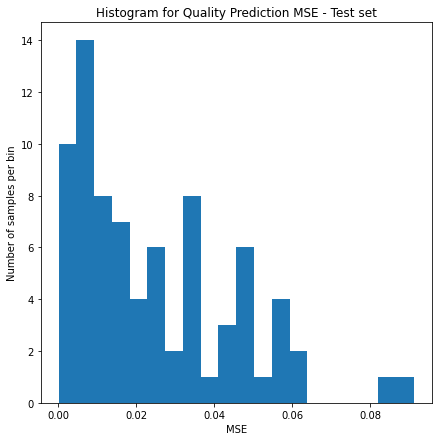

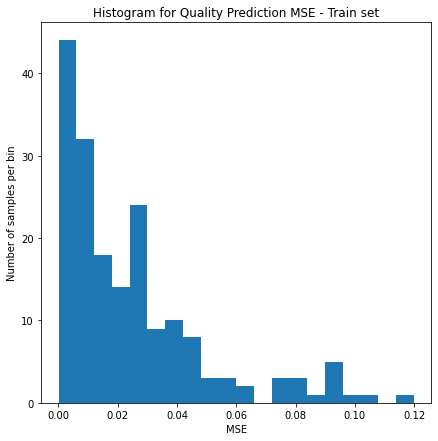

In [8]:
##########################################################
# Test set
all_res_predict = []

for i in range(Y_test.shape[0]):
    all_res_predict.append(mean_squared_error(Y_test[i], grid_search.predict(np.matrix(X_test[i]))))

plt.hist(all_res_predict, bins = 20)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE - Test set")
plt.show()

###########################################################
# Train set
all_res_predict = []

for i in range(Y_train.shape[0]):
    all_res_predict.append(mean_squared_error(Y_train[i], grid_search.predict(np.matrix(X_train[i]))))

plt.hist(all_res_predict, bins = 20)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE - Train set")
plt.show()

# Model Prediction - Visualization 2D

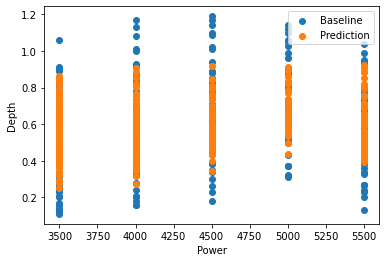

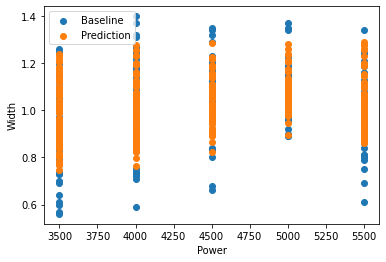

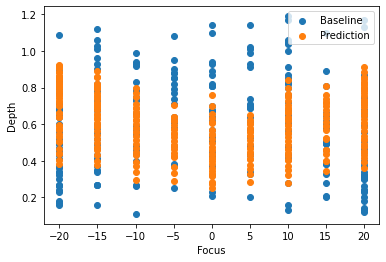

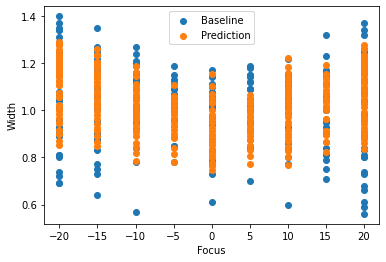

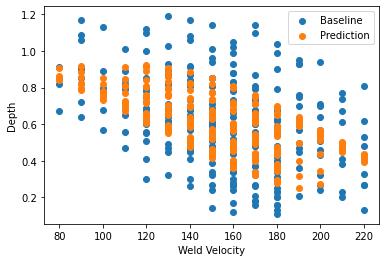

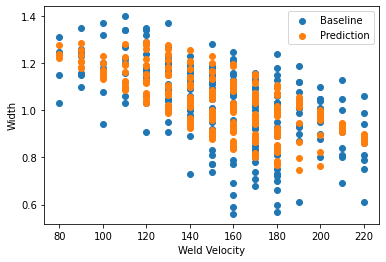

In [9]:
%matplotlib inline

pred_norm = estimator.predict(X_norm)
pred_denorm = min_max_scaler_y.inverse_transform(pred_norm)
pred_pd = pd.DataFrame(pred_denorm, columns=[dataset_meta[3:]])

plt.scatter(target_dataset[["power"]].values, target_dataset[["penetration"]].values, label="Baseline")
plt.scatter(target_dataset[["power"]].values, pred_pd[["penetration"]].values, label="Prediction")
plt.xlabel("Power")
plt.ylabel("Depth")
plt.legend()
plt.show()

plt.scatter(target_dataset[["power"]].values, target_dataset[["weld_width"]].values, label="Baseline")
plt.scatter(target_dataset[["power"]].values, pred_pd[["weld_width"]].values, label="Prediction")
plt.xlabel("Power")
plt.ylabel("Width")
plt.legend()
plt.show()


plt.scatter(target_dataset[["focus"]].values, target_dataset[["penetration"]].values, label="Baseline")
plt.scatter(target_dataset[["focus"]].values, pred_pd[["penetration"]].values, label="Prediction")
plt.xlabel("Focus")
plt.ylabel("Depth")
plt.legend()
plt.show()

plt.scatter(target_dataset[["focus"]].values, target_dataset[["weld_width"]].values, label="Baseline")
plt.scatter(target_dataset[["focus"]].values, pred_pd[["weld_width"]].values, label="Prediction")
plt.xlabel("Focus")
plt.ylabel("Width")
plt.legend()
plt.show()

plt.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["penetration"]].values, label="Baseline")
plt.scatter(target_dataset[["weld_velocity"]].values, pred_pd[["penetration"]].values, label="Prediction")
plt.xlabel("Weld Velocity")
plt.ylabel("Depth")
plt.legend()
plt.show()

plt.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["weld_width"]].values, label="Baseline")
plt.scatter(target_dataset[["weld_velocity"]].values, pred_pd[["weld_width"]].values, label="Prediction")
plt.xlabel("Weld Velocity")
plt.ylabel("Width")
plt.legend()
plt.show()

# Model Prediction - Visualization 3D

<IPython.core.display.Javascript object>


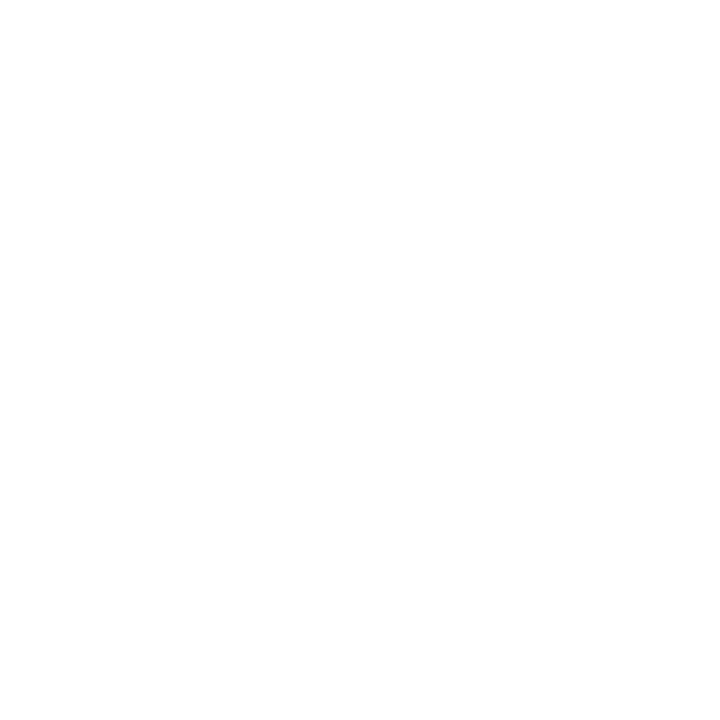

<IPython.core.display.Javascript object>


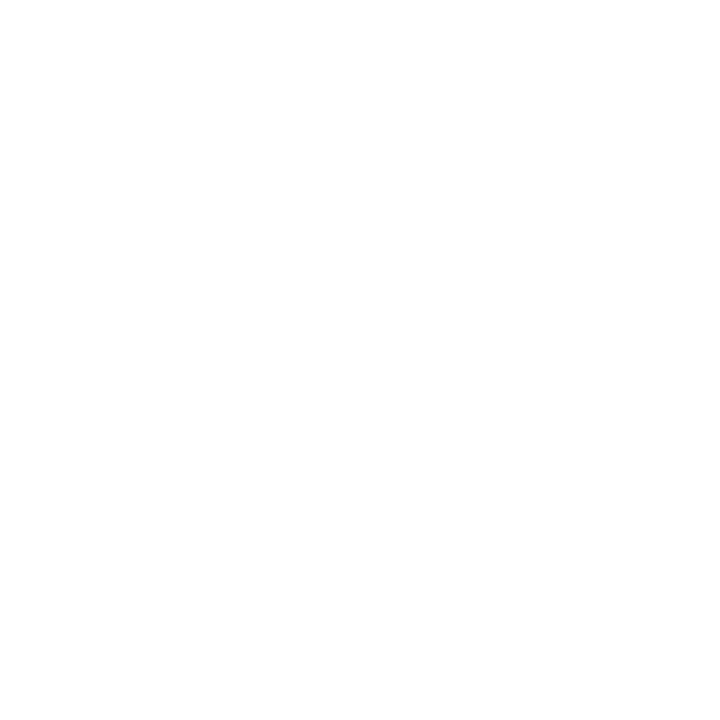

<IPython.core.display.Javascript object>


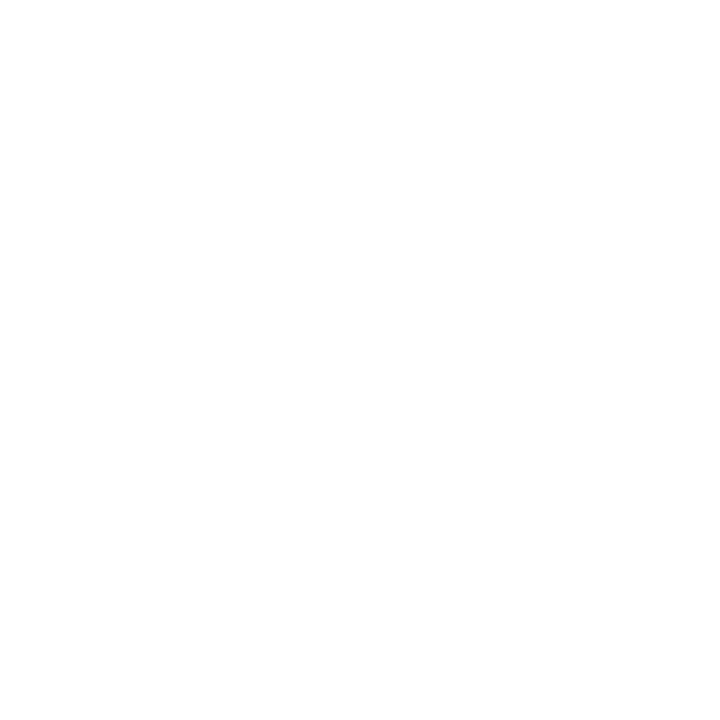

<IPython.core.display.Javascript object>


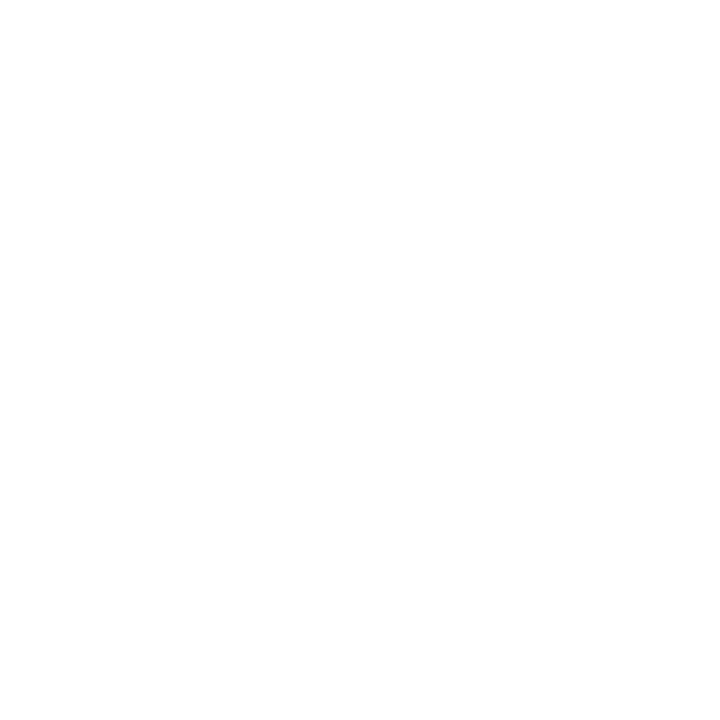

<IPython.core.display.Javascript object>


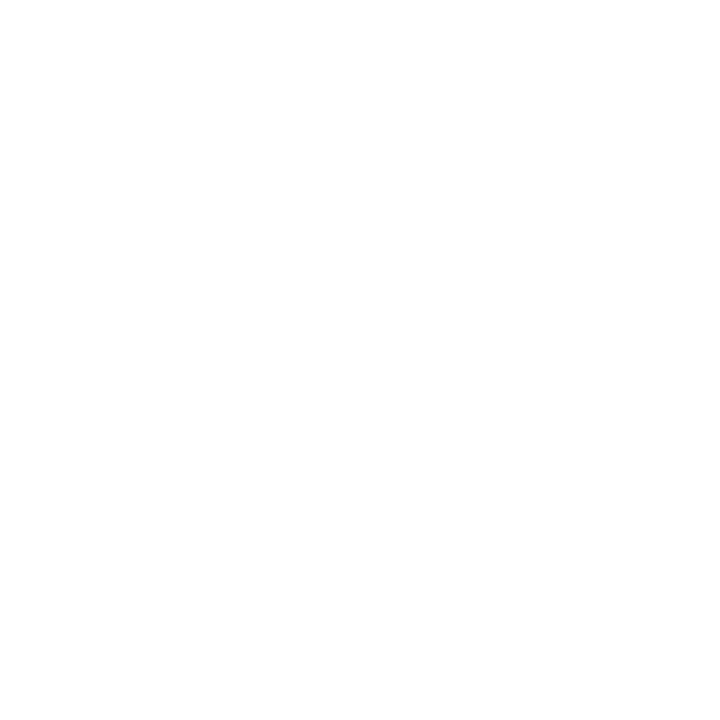

<IPython.core.display.Javascript object>


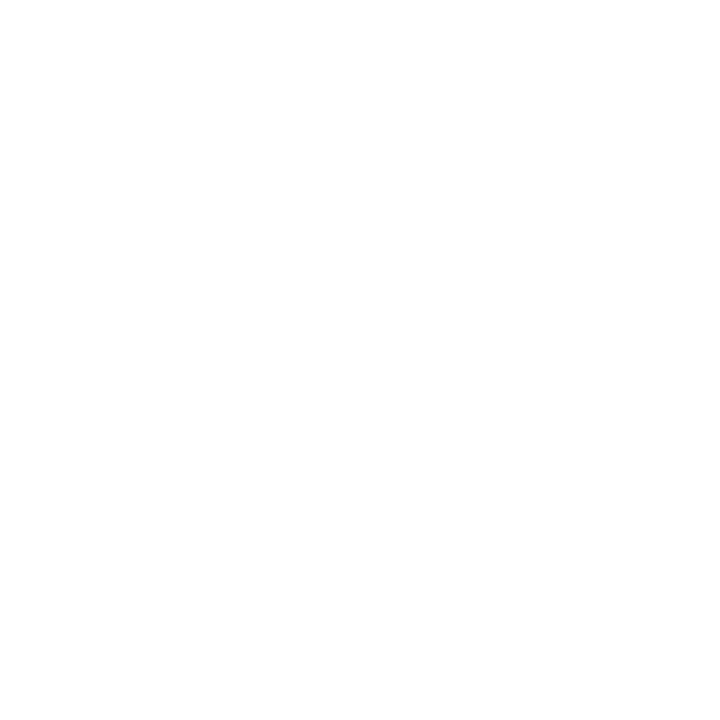

<IPython.core.display.Javascript object>


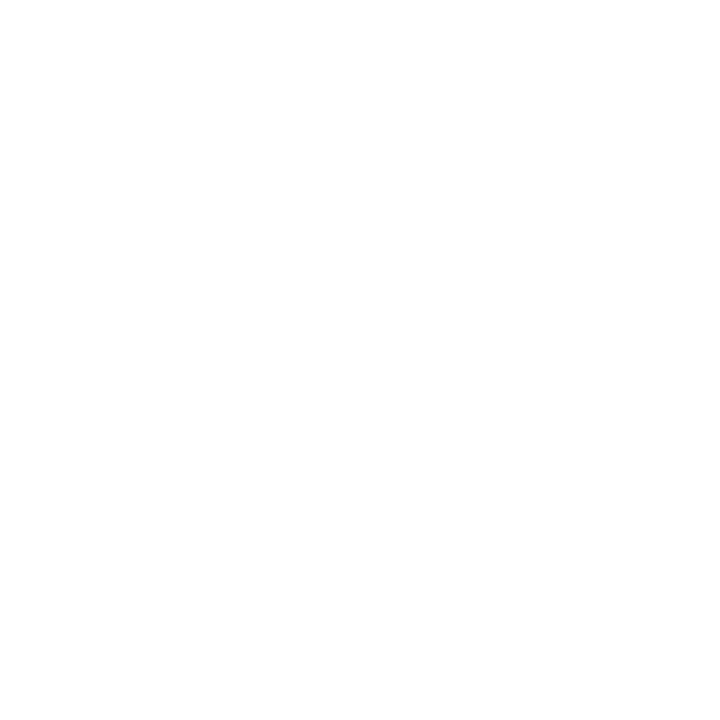

<IPython.core.display.Javascript object>


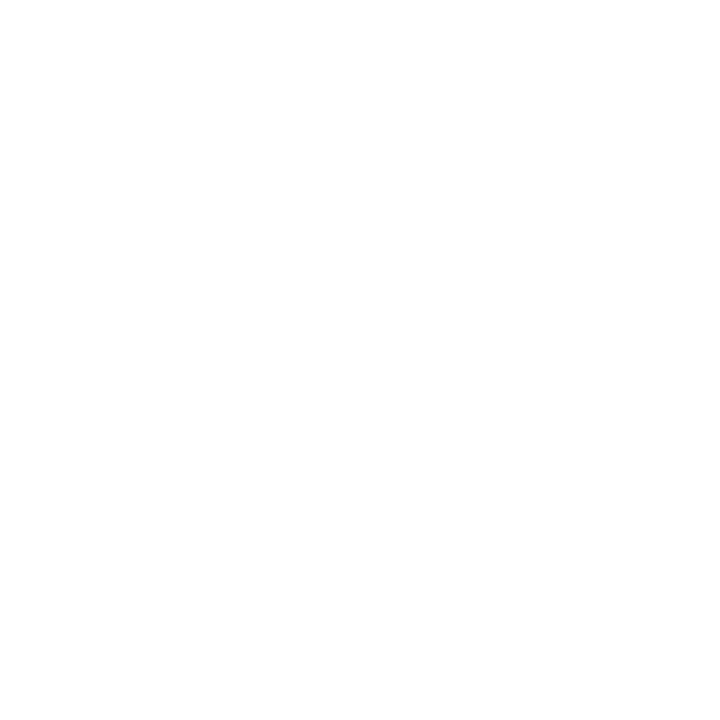

<IPython.core.display.Javascript object>


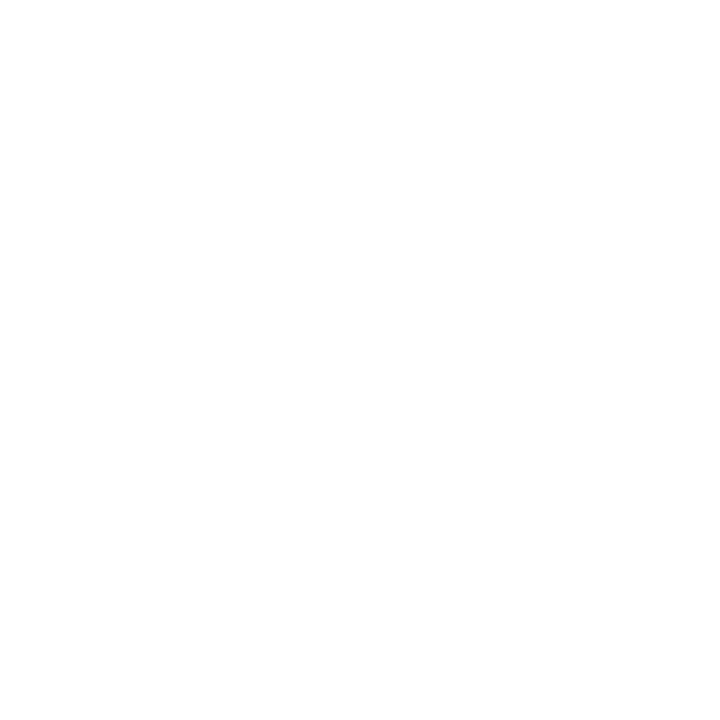

<IPython.core.display.Javascript object>


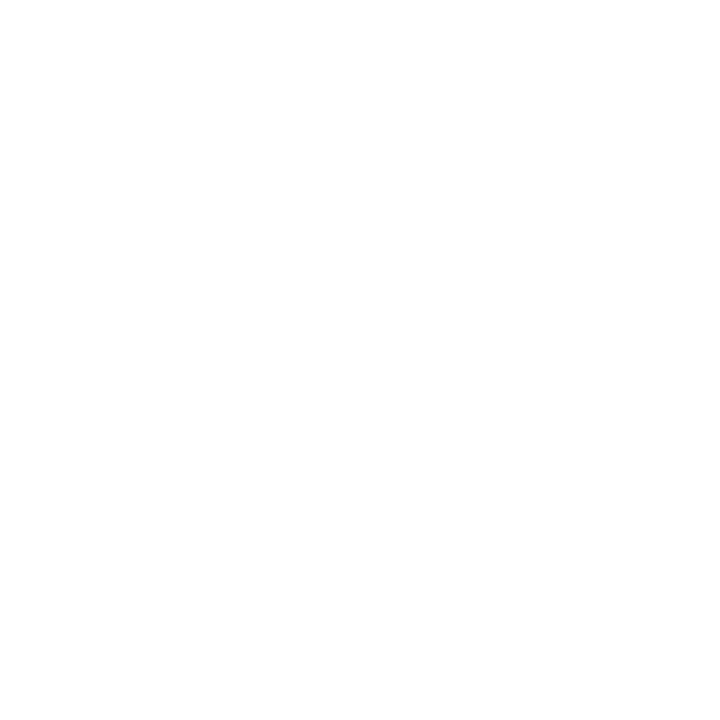

<IPython.core.display.Javascript object>


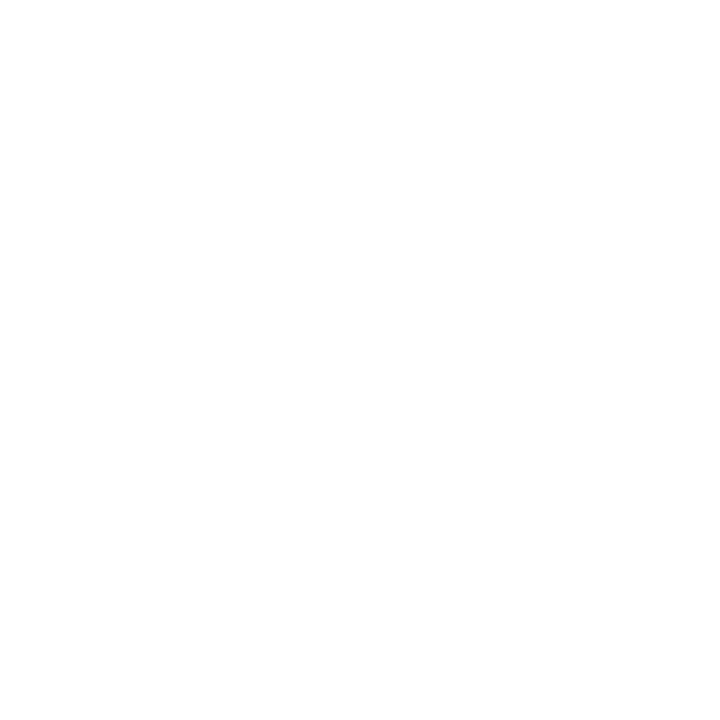

<IPython.core.display.Javascript object>


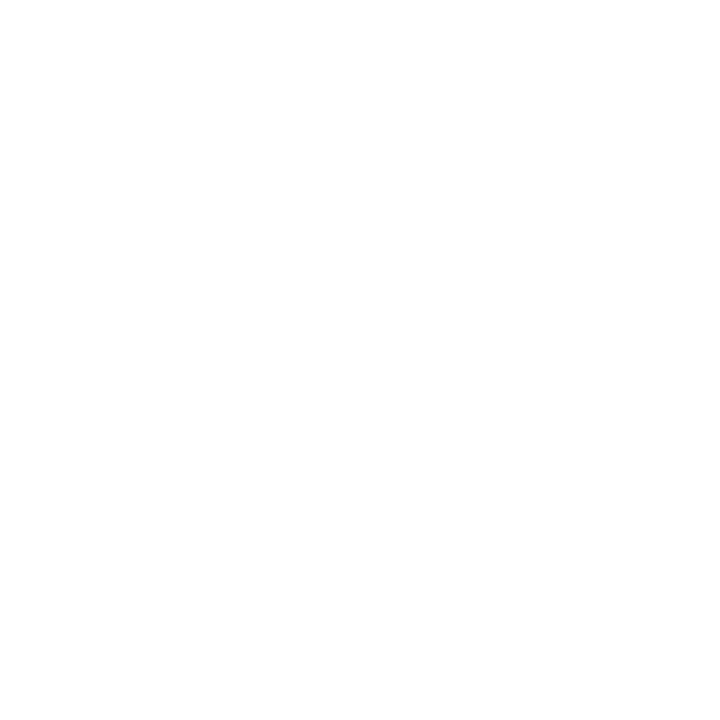

In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (8,8)

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, target_dataset[["penetration"]].values, label="Dataset")
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, pred_pd[["penetration"]].values, label="Predicted")
ax.set_title("Power and Focus VS Depth")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")
ax.legend()

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, target_dataset[["weld_width"]].values, label="Dataset")
ax.scatter(target_dataset[["power"]].values, target_dataset[["focus"]].values, pred_pd[["weld_width"]].values, label="Predicted")
ax.set_title("Power and Focus VS Width")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")
ax.legend()







##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, target_dataset[["penetration"]].values, label="Dataset")
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, pred_pd[["penetration"]].values, label="Predicted")
ax.set_title("Weld Velocity and Focus VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")
ax.legend()

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, target_dataset[["weld_width"]].values, label="Dataset")
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["focus"]].values, pred_pd[["weld_width"]].values, label="Predicted")
ax.set_title("Weld Velocity and Focus VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")
ax.legend()









##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, target_dataset[["penetration"]].values, label="Dataset")
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, pred_pd[["penetration"]].values, label="Predicted")
ax.set_title("Weld Velocity and Power VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Depth")
ax.legend()

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, target_dataset[["weld_width"]].values, label="Dataset")
ax.scatter(target_dataset[["weld_velocity"]].values, target_dataset[["power"]].values, pred_pd[["weld_width"]].values, label="Predicted")
ax.set_title("Weld Velocity and Power VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Width")
ax.legend()


plt.show()

# Meta-heuristics Parameter Estimation

As the main purpose of training such models is to perform process parameter optimization, we will now assess the performance of the model by providing a set of process quality values from the dataset, and by using optimization algorithms, the best process parameters should be found. This optimization process simulates what could happen in a real scenario when a shop-floor operator needs to know the most suitable machine parameterization in order to meet the customer specifications. In this context, the process quality parameters defined by the customer are the weld width and depth yielding more robust or fragile welds in the final product. Different customers might have different requirements depending on the product application. One might only want to join metal sheets for aesthetics, where not a strong joining is required when compared with a car chassis that should be as strong and robust as possible in the automotive industry. Therefore, based on these quality values, the process parameter optimization should return the parameters to be used in the machine.

Regarding the problem formulation, we aim to minimize the difference between the real process quality (here called target) and the solution generated by the algorithm. For that purpose, the loss function used was simply the MSE to assess these differences.

In [11]:
%matplotlib inline

from scipy.optimize import minimize, basinhopping
from random import randint
from scipy.optimize import dual_annealing
import math
import matplotlib.pyplot as plt
all_results = []
all_estimations = []

def mse_calc(x_values):
    return math.sqrt(mean_squared_error(estimator.predict(np.matrix(x_values)), target))

def callbackF(x_values, f, context):
    global iteration
    print("Iteration: {0}, Estimation: {1}, MSE: {2}".format(iteration, x_values, mse_calc(x_values)))
    iteration += 1
    
for sample_i in range(X_test.shape[0]):
    
    iteration = 1

    print("X norm: " , X_test[sample_i])
    print("Y norm: " , Y_test[sample_i])

    # define the target for the optimization routine
    target = Y_test[sample_i]

    print("Target: " , target)

    # Initial guess as an array of 0s
    x0 = [0] * X_test.shape[1]
    # boundaries are important to avoid exploring solutions outside the space where the model was trained for.
    # Since data was normalized the boundaries are between 0 and 1.
    bnds = ((0, 1), (0, 1), (0, 1))
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bnds}


    ###########################################################
    # Optimization
    res = basinhopping(mse_calc, x0, minimizer_kwargs=minimizer_kwargs, niter=20000, niter_success=1000, T=10)
    #res = minimize(mse_calc, x0, method='nelder-mead',options={'xatol': 1e-15, 'disp': True, 'fatol': 1e-15})
    
    '''
    res = dual_annealing(mse_calc,
                         bounds=bnds,
                         #callback=callbackF,
                         restart_temp_ratio = 0.01,
                         initial_temp = 10000)
    '''
    
    estimation = res.x
    prediction = estimator.predict(np.matrix(estimation))

    mse_estimation = mean_squared_error(estimation, X_test[sample_i])
    mse_prediction = mean_squared_error(prediction, target)
    
    print("Estimated parameters (X norm): " , estimation , X_test[sample_i], " MSE: " , mse_estimation)
    print("Closest quality prediction (Y norm): " , prediction , target, " MSE: " , mse_prediction)

    print("Estimated parameters (X): " , min_max_scaler_x.inverse_transform(np.matrix(estimation)) , min_max_scaler_x.inverse_transform(np.matrix(X_test[sample_i])))
    print("Closest quality prediction (Y): " , min_max_scaler_y.inverse_transform(np.matrix(prediction)), min_max_scaler_y.inverse_transform(np.matrix(target)))
    
    print("Iteration " , sample_i , " out of " , X_test.shape[0])
    
    all_results.append(mse_prediction)
    all_estimations.append(mse_estimation)


X norm:  [0.25       1.         0.28571429]
Y norm:  [0.37037037 0.73809524]
Target:  [0.37037037 0.73809524]
Estimated parameters (X norm):  [0.         0.         0.29404852] [0.25       1.         0.28571429]  MSE:  0.3541898198279892
Closest quality prediction (Y norm):  [0.50431335 0.60667   ] [0.37037037 0.73809524]  MSE:  0.017606654570458957
Estimated parameters (X):  [[3500.          -20.          121.16679299]] [[4000.   20.  120.]]
Closest quality prediction (Y):  [[0.65465844 1.0696027 ]] [[0.51 1.18]]
Iteration  0  out of  78
X norm:  [0. 0. 0.]
Y norm:  [0.51851852 0.82142857]
Target:  [0.51851852 0.82142857]
Estimated parameters (X norm):  [0.16038021 0.5950678  0.18620451] [0. 0. 0.]  MSE:  0.13816653801115772
Closest quality prediction (Y norm):  [0.61845464 0.7254319 ] [0.51851852 0.82142857]  MSE:  0.009601292332366831
Estimated parameters (X):  [[3820.76041835    3.80271187  106.06863148]] [[3500.  -20.   80.]]
Closest quality prediction (Y):  [[0.77793103 1.1693628

Estimated parameters (X norm):  [0.03447229 0.37536101 0.45650961] [0.25       1.         0.42857143]  MSE:  0.14580220060343985
Closest quality prediction (Y norm):  [0.3586297  0.45675707] [0.31481481 0.5       ]  MSE:  0.0018948477927604763
Estimated parameters (X):  [[3568.94458745   -4.9855596   143.91134514]] [[4000.   20.  140.]]
Closest quality prediction (Y):  [[0.4973201 0.9436759]] [[0.45 0.98]]
Iteration  16  out of  78
X norm:  [1.         0.75       0.71428571]
Y norm:  [0.86111111 0.55952381]
Target:  [0.86111111 0.55952381]
Estimated parameters (X norm):  [1.         0.         0.56482191] [1.         0.75       0.71428571]  MSE:  0.19494647622952557
Closest quality prediction (Y norm):  [0.6517013  0.76038146] [0.86111111 0.55952381]  MSE:  0.04209813837139724
Estimated parameters (X):  [[5500.          -20.          159.07506745]] [[5500.   10.  180.]]
Closest quality prediction (Y):  [[0.8138374 1.1987203]] [[1.04 1.03]]
Iteration  17  out of  78
X norm:  [0.75      

Estimated parameters (X norm):  [0.         1.         0.44057878] [0.25 0.   0.5 ]  MSE:  0.35534362718140855
Closest quality prediction (Y norm):  [0.32768613 0.4250403 ] [0.21296296 0.53571429]  MSE:  0.012705067683400604
Estimated parameters (X):  [[3500.           20.          141.68102901]] [[4000.  -20.  150.]]
Closest quality prediction (Y):  [[0.463901   0.91703385]] [[0.34 1.01]]
Iteration  32  out of  78
X norm:  [0.75       0.125      0.57142857]
Y norm:  [0.57407407 0.78571429]
Target:  [0.57407407 0.78571429]
Estimated parameters (X norm):  [0.2153317  0.         0.23454495] [0.75       0.125      0.57142857]  MSE:  0.1383285907900059
Closest quality prediction (Y norm):  [0.62696755 0.73437345] [0.57407407 0.78571429]  MSE:  0.0027168005535935786
Estimated parameters (X):  [[3930.66339102  -20.          112.83629255]] [[5000.  -15.  160.]]
Closest quality prediction (Y):  [[0.787125  1.1768737]] [[0.73 1.22]]
Iteration  33  out of  78
X norm:  [0.         0.75       0.21

Estimated parameters (X norm):  [0.         0.0344273  0.32003234] [0.         0.625      0.42857143]  MSE:  0.12018561500875263
Closest quality prediction (Y norm):  [0.48029274 0.5818544 ] [0.42592593 0.63095238]  MSE:  0.002683180818070158
Estimated parameters (X):  [[3500.          -18.62290794  124.80452818]] [[3500.    5.  140.]]
Closest quality prediction (Y):  [[0.6287162 1.0487577]] [[0.57 1.09]]
Iteration  48  out of  78
X norm:  [0.5        0.         0.42857143]
Y norm:  [0.37962963 0.72619048]
Target:  [0.37962963 0.72619048]
Estimated parameters (X norm):  [0.         0.48566323 0.26296687] [0.5        0.         0.42857143]  MSE:  0.17109788160364592
Closest quality prediction (Y norm):  [0.50622195 0.60863376] [0.37962963 0.72619048]  MSE:  0.014922598951254511
Estimated parameters (X):  [[3500.           -0.57347073  116.8153617 ]] [[4500.  -20.  140.]]
Closest quality prediction (Y):  [[0.65671974 1.0712523 ]] [[0.52 1.17]]
Iteration  49  out of  78
X norm:  [0.5     

Estimated parameters (X norm):  [1.         0.         0.52648888] [0.5   0.625 0.5  ]  MSE:  0.21377555357152922
Closest quality prediction (Y norm):  [0.67268395 0.78257346] [0.83333333 0.63095238]  MSE:  0.024398587539870377
Estimated parameters (X):  [[5500.          -20.          153.70844307]] [[4500.    5.  150.]]
Closest quality prediction (Y):  [[0.8364987 1.2173617]] [[1.01 1.09]]
Iteration  64  out of  78
X norm:  [0.75       0.75       0.57142857]
Y norm:  [0.87037037 0.61904762]
Target:  [0.87037037 0.61904762]
Estimated parameters (X norm):  [1.         0.87564714 0.44904324] [0.75       0.75       0.57142857]  MSE:  0.031088458056971736
Closest quality prediction (Y norm):  [0.6852492  0.79590476] [0.87037037 0.61904762]  MSE:  0.03277414549217009
Estimated parameters (X):  [[5500.           15.02588557  142.8660529 ]] [[5000.   10.  160.]]
Closest quality prediction (Y):  [[0.85006917 1.22856   ]] [[1.05 1.08]]
Iteration  65  out of  78
X norm:  [1.         0.         0

# Histogram plot for Quality Prediction and Parameter Estimation

One of the concerns to have once performing machine parameter estimation is to look for the correct information. If you only look for MSE coming from the optimization method, in other words, the difference between the defined target and predicted Y from the meta-heuristic algorithm, you can only conclude that the algorithm used can converge towards a minimum. However, the minimum in terms of different between target and predicted Y might not yield a good machine parameter estimation because different machine parameters X might result in the same, or close, quality prediction Y.

Thus, the correct way to interpret the results and understand if the implemented strategy can be used in production is to assess the MSE of the machine parameter estimation against the ground truth. This way, a histogram should be plotted to understand if the strategy will yield good results in the future.

## Why not using the machine parameters in the loss function?

This should not be the case because in a real situation the customer will provide you with the target quality, and you should only use this information to provide a machine parameter estimation.

Quality Prediction Mean and STD,  0.006339496770713431 0.008767617531059329
Parameter Estimation Mean and STD,  0.20711330535754222 0.14063517249906698


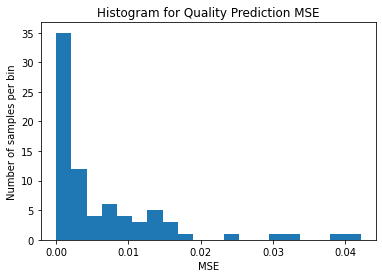

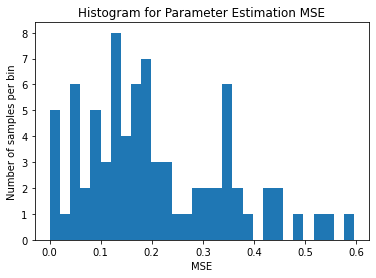

In [12]:
import statistics 

print("Quality Prediction Mean and STD, " , statistics.mean(all_results), statistics.stdev(all_results))
print("Parameter Estimation Mean and STD, " , statistics.mean(all_estimations), statistics.stdev(all_estimations))

plt.hist(all_results, bins = 20)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE")
plt.show()

plt.hist(all_estimations, bins = 30)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Parameter Estimation MSE")
plt.show()

# Better strategy for optimization?

The playbook strategy is based on declaring the initial guess of the optimization method to shorten the search space for optimal or near-optimal solutions. In sum, this strategy finds the machine parameters used in the past the yielded the closest quality prediction. This way, instead of starting with a random or zero array as an initial guess, the algorithm will 'de facto' start with an initial guess. In some cases this might not be true, but the rational for this strategy is that similar product qualities should have similar machine parameters. 

In [13]:
%matplotlib inline

from scipy.optimize import minimize, basinhopping
from random import randint
from scipy.optimize import dual_annealing
import math
import matplotlib.pyplot as plt
all_results_opt = []
all_estimations_opt = []

def mse_calc(x_values):
    return math.sqrt(mean_squared_error(estimator.predict(np.matrix(x_values)), target))

def callbackF(x_values, f, context):
    global iteration
    print("Iteration: {0}, Estimation: {1}, MSE: {2}".format(iteration, x_values, mse_calc(x_values)))
    iteration += 1
    
    
def find_closest_parameter():
    global target
    minimum = 9999
    index = -1
    for i in range(Y_train.shape[0]):
        diff = sum(abs(target-Y_train[i]))
        if diff < minimum:
            minimum = diff
            index = i
    return index
    
for sample_i in range(X_test.shape[0]):
    
    iteration = 1

    print("X norm: " , X_test[sample_i])
    print("Y norm: " , Y_test[sample_i])

    target = Y_test[sample_i]

    print("Target: " , target)

    # Initial guess
    c = find_closest_parameter()
    if c == -1:
        x0 = [0] * X_train.shape[1]
    else:
        x0 = X_train[c]
        
    print("Closest from training set: " , Y_train[c] , target)
    bnds = ((0, 1), (0, 1), (0, 1))
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bnds}


    ###########################################################
    # Optimization
    res = basinhopping(mse_calc, x0, minimizer_kwargs=minimizer_kwargs, niter=20000, niter_success=1000, T=10)
    #res = minimize(mse_calc, x0, method='nelder-mead',options={'xatol': 1e-15, 'disp': True, 'fatol': 1e-15})
    
    '''
    res = dual_annealing(mse_calc,
                         bounds=bnds,
                         #callback=callbackF,
                         restart_temp_ratio = 0.01,
                         initial_temp = 10000)
    '''
    
    estimation = res.x
    prediction = estimator.predict(np.matrix(estimation))

    mse_estimation = mean_squared_error(estimation, X_test[sample_i])
    mse_prediction = mean_squared_error(prediction, target)
    
    print("Estimated parameters (X norm): " , estimation , X_test[sample_i], " MSE: " , mse_estimation)
    print("Closest quality prediction (Y norm): " , prediction , target, " MSE: " , mse_prediction)

    print("Estimated parameters (X): " , min_max_scaler_x.inverse_transform(np.matrix(estimation)) , min_max_scaler_x.inverse_transform(np.matrix(X_test[sample_i])))
    print("Closest quality prediction (Y): " , min_max_scaler_y.inverse_transform(np.matrix(prediction)), min_max_scaler_y.inverse_transform(np.matrix(target)))
    
    print("Iteration " , sample_i , " out of " , X_test.shape[0])
    
    all_results_opt.append(mse_prediction)
    all_estimations_opt.append(mse_estimation)


X norm:  [0.25       1.         0.28571429]
Y norm:  [0.37037037 0.73809524]
Target:  [0.37037037 0.73809524]
Closest from training set:  [0.36111111 0.76190476] [0.37037037 0.73809524]
Estimated parameters (X norm):  [0.         0.         0.29314481] [0.25       1.         0.28571429]  MSE:  0.3541850709119263
Closest quality prediction (Y norm):  [0.5050799 0.6074628] [0.37037037 0.73809524]  MSE:  0.01760574594811097
Estimated parameters (X):  [[3500.          -20.          121.04027382]] [[4000.   20.  120.]]
Closest quality prediction (Y):  [[0.65548635 1.0702688 ]] [[0.51 1.18]]
Iteration  0  out of  78
X norm:  [0. 0. 0.]
Y norm:  [0.51851852 0.82142857]
Target:  [0.51851852 0.82142857]
Closest from training set:  [0.52777778 0.79761905] [0.51851852 0.82142857]
Estimated parameters (X norm):  [0.         0.         0.14376827] [0. 0. 0.]  MSE:  0.006889771559024981
Closest quality prediction (Y norm):  [0.6198054 0.7268647] [0.51851852 0.82142857]  MSE:  0.009600679045464088
Es

Estimated parameters (X norm):  [0.         0.37400341 0.36052874] [0.25  0.875 0.5  ]  MSE:  0.11098327024907446
Closest quality prediction (Y norm):  [0.4273938 0.5273545] [0.37037037 0.58333333]  MSE:  0.0031926515000429197
Estimated parameters (X):  [[3500.           -5.0398634   130.47402351]] [[4000.   15.  150.]]
Closest quality prediction (Y):  [[0.57158536 1.0029777 ]] [[0.51 1.05]]
Iteration  14  out of  78
X norm:  [1.         0.375      0.92857143]
Y norm:  [0.61111111 0.67857143]
Target:  [0.61111111 0.67857143]
Closest from training set:  [0.62037037 0.71428571] [0.61111111 0.67857143]
Estimated parameters (X norm):  [1.        1.        0.5967971] [1.         0.375      0.92857143]  MSE:  0.16689973537467262
Closest quality prediction (Y norm):  [0.5919051  0.69760484] [0.61111111 0.67857143]  MSE:  0.0003655703850011247
Estimated parameters (X):  [[5500.           20.          163.55159378]] [[5500.   -5.  210.]]
Closest quality prediction (Y):  [[0.74925756 1.1459881 ]

Estimated parameters (X norm):  [1.         0.70602513 0.56584185] [0.    0.125 0.   ]  MSE:  0.552589069660207
Closest quality prediction (Y norm):  [0.6252702 0.7325499] [0.65740741 0.70238095]  MSE:  0.0009714833147930796
Estimated parameters (X):  [[5500.            8.24100531  159.2178596 ]] [[3500.  -15.   80.]]
Closest quality prediction (Y):  [[0.78529185 1.1753418 ]] [[0.82 1.15]]
Iteration  28  out of  78
X norm:  [0.5        1.         0.21428571]
Y norm:  [0.62962963 0.92857143]
Target:  [0.62962963 0.92857143]
Closest from training set:  [0.63888889 0.92857143] [0.62962963 0.92857143]
Estimated parameters (X norm):  [0.25537761 0.80338449 0.        ] [0.5        1.         0.21428571]  MSE:  0.04813871335908204
Closest quality prediction (Y norm):  [0.7253982 0.8388772] [0.62962963 0.92857143]  MSE:  0.008608335117390155
Estimated parameters (X):  [[4010.75521755   12.13537963   80.        ]] [[4500.   20.  110.]]
Closest quality prediction (Y):  [[0.89343005 1.2646568 ]] 

Estimated parameters (X norm):  [1.         0.42571047 0.65132395] [0.25       0.75       0.42857143]  MSE:  0.23909412779972547
Closest quality prediction (Y norm):  [0.5767561  0.68180823] [0.67592593 0.58333333]  MSE:  0.009765978188550994
Estimated parameters (X):  [[5500.           -2.97158109  171.18535304]] [[4000.   10.  140.]]
Closest quality prediction (Y):  [[0.7328966 1.1327189]] [[0.84 1.05]]
Iteration  42  out of  78
X norm:  [0.25       0.         0.21428571]
Y norm:  [0.67592593 1.        ]
Target:  [0.67592593 1.        ]
Closest from training set:  [0.7037037  0.96428571] [0.67592593 1.        ]
Estimated parameters (X norm):  [0.95427302 0.         0.        ] [0.25       0.         0.21428571]  MSE:  0.18063961993375796
Closest quality prediction (Y norm):  [0.7845459 0.9036087] [0.67592593 1.        ]  MSE:  0.010544792521911546
Estimated parameters (X):  [[5408.54604817  -20.           80.        ]] [[4000.  -20.  110.]]
Closest quality prediction (Y):  [[0.957309

Estimated parameters (X norm):  [0.01201329 0.11787663 0.34828171] [0.5        0.75       0.64285714]  MSE:  0.24149522426017087
Closest quality prediction (Y norm):  [0.4563629 0.5571772] [0.4537037  0.55952381]  MSE:  6.288991715311827e-06
Estimated parameters (X):  [[3524.02658398  -15.28493496  128.7594394 ]] [[4500.   10.  170.]]
Closest quality prediction (Y):  [[0.60287195 1.0280288 ]] [[0.6  1.03]]
Iteration  56  out of  78
X norm:  [0.         0.         0.21428571]
Y norm:  [0.41666667 0.76190476]
Target:  [0.41666667 0.76190476]
Closest from training set:  [0.41666667 0.71428571] [0.41666667 0.76190476]
Estimated parameters (X norm):  [0.19379806 0.76893928 0.29727623] [0.         0.         0.21428571]  MSE:  0.21190424281108736
Closest quality prediction (Y norm):  [0.53978044 0.6433842 ] [0.41666667 0.76190476]  MSE:  0.014602059977496033
Estimated parameters (X):  [[3887.59611361   10.75757118  121.61867241]] [[3500.  -20.  110.]]
Closest quality prediction (Y):  [[0.692

Estimated parameters (X norm):  [0.         0.00689357 0.48648473] [0.5        0.875      0.71428571]  MSE:  0.3518340232811537
Closest quality prediction (Y norm):  [0.338346   0.43597913] [0.25       0.52380952]  MSE:  0.007759597478552523
Estimated parameters (X):  [[3500.          -19.72425737  148.10786209]] [[4500.   15.  180.]]
Closest quality prediction (Y):  [[0.47541368 0.92622244]] [[0.38 1.  ]]
Iteration  70  out of  78
X norm:  [0.5        0.625      0.57142857]
Y norm:  [0.84259259 0.55952381]
Target:  [0.84259259 0.55952381]
Closest from training set:  [0.91666667 0.54761905] [0.84259259 0.55952381]
Estimated parameters (X norm):  [0.90813821 0.61496447 0.50193952] [0.5        0.625      0.57142857]  MSE:  0.05716874574521271
Closest quality prediction (Y norm):  [0.6415941 0.7497206] [0.84259259 0.55952381]  MSE:  0.038287599115763585
Estimated parameters (X):  [[5316.27641809    4.59857865  150.27153346]] [[4500.    5.  160.]]
Closest quality prediction (Y):  [[0.80292

Quality Prediction Mean and STD,  0.006339147916010326 0.008767497335975444
Parameter Estimation Mean and STD,  0.16527025084745076 0.13575099236055183


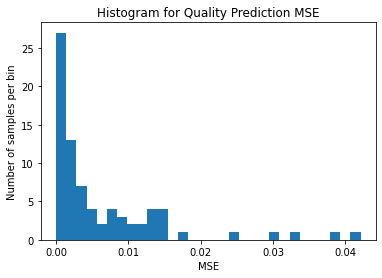

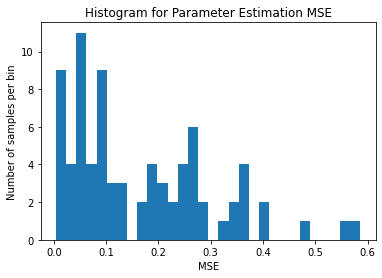

In [14]:
import statistics 

print("Quality Prediction Mean and STD, " , statistics.mean(all_results_opt), statistics.stdev(all_results_opt))
print("Parameter Estimation Mean and STD, " , statistics.mean(all_estimations_opt), statistics.stdev(all_estimations_opt))

plt.hist(all_results_opt, bins = 30)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE")
plt.show()

plt.hist(all_estimations_opt, bins = 30)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Parameter Estimation MSE")
plt.show()

